# Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 150 # increase image resolution

# How does Scikit-Learn Library's KNN work?

In [2]:
# Define weight function to print what Scikit-Learn does.
def weight_print(weights):
    print('weight:',weights)
    return None

In [3]:
# Create a sample dataset.
sample_X = np.array([10,1,2,5,6,5,7,0,2,1]).reshape(-1,1)
sample_y = np.array([2.3,0.2,0.5,1,1.6,1.5,1.4,0.1,0.5,0.2])

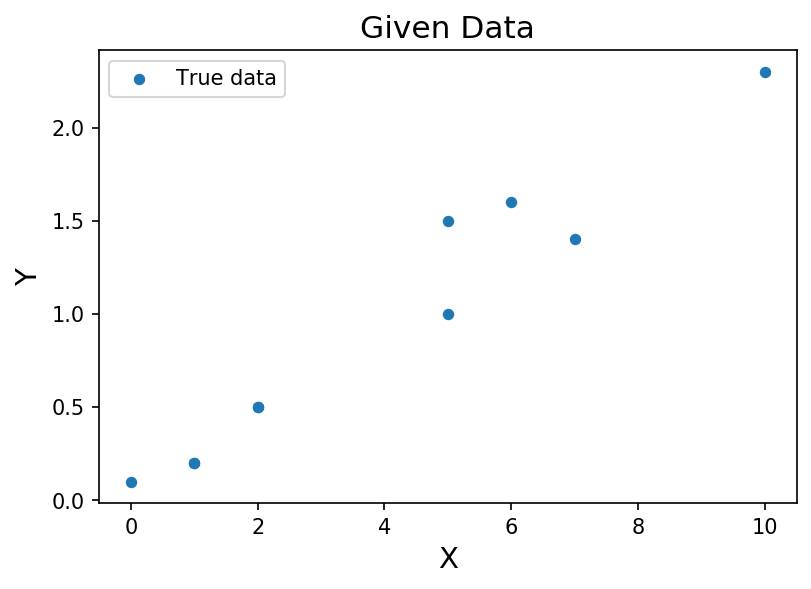

In [4]:
plt.scatter(sample_X,sample_y,label='True data',s=20)
plt.title('Given Data',fontsize=15)
plt.xlabel('X',fontsize=14)
plt.ylabel('Y',fontsize=14)
plt.legend()

In [5]:
# Use our custom weight function to fit a model and predict a single point
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5,weights=weight_print)
knn.fit(sample_X, sample_y)
predicted_single_point = knn.predict([[1]])
print('predicred_y:',predicted_single_point)

weight: [[0. 0. 1. 1. 1.]]
predicred_y: [0.3]


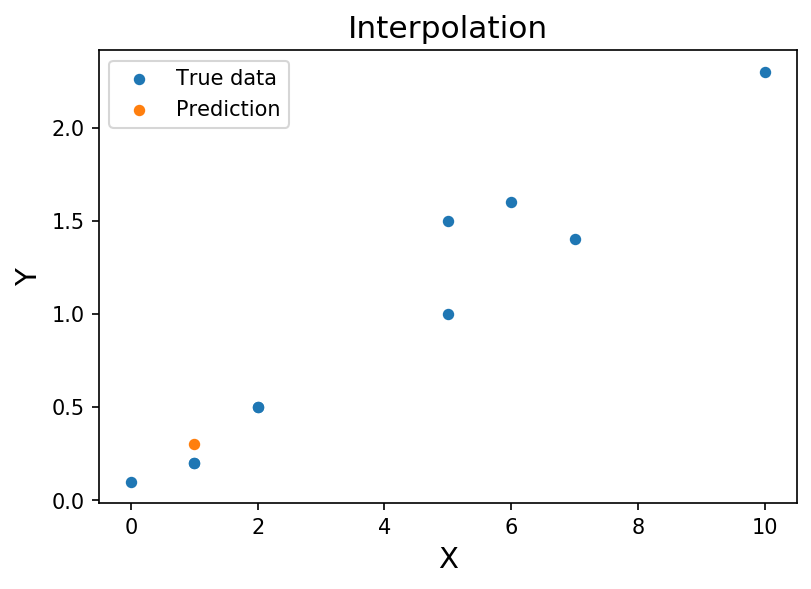

In [6]:
plt.scatter(sample_X,sample_y,label='True data',s=20)
plt.scatter([1],predicted_single_point,label='Prediction',s=20)
plt.title('Interpolation',fontsize=15)
plt.xlabel('X',fontsize=14)
plt.ylabel('Y',fontsize=14)
plt.legend()

# Let's Interpolate

In [7]:
# Generate 1000 dense data points
test_X = (np.array(list(range(0,10000)))/1000).reshape(-1,1)
y_pred = knn.predict(test_X)
y_pred

weight: [[0.00000000e+00 1.00000000e+00 1.00000000e+00 2.00000000e+00
  2.00000000e+00]
 [1.00000000e-03 9.99000000e-01 9.99000000e-01 1.99900000e+00
  1.99900000e+00]
 [2.00000000e-03 9.98000000e-01 9.98000000e-01 1.99800000e+00
  1.99800000e+00]
 ...
 [3.00000000e-03 2.99700000e+00 3.99700000e+00 4.99700000e+00
  4.99700000e+00]
 [2.00000000e-03 2.99800000e+00 3.99800000e+00 4.99800000e+00
  4.99800000e+00]
 [9.99999999e-04 2.99900000e+00 3.99900000e+00 4.99900000e+00
  4.99900000e+00]]


array([0.3 , 0.3 , 0.3 , ..., 1.56, 1.56, 1.56])

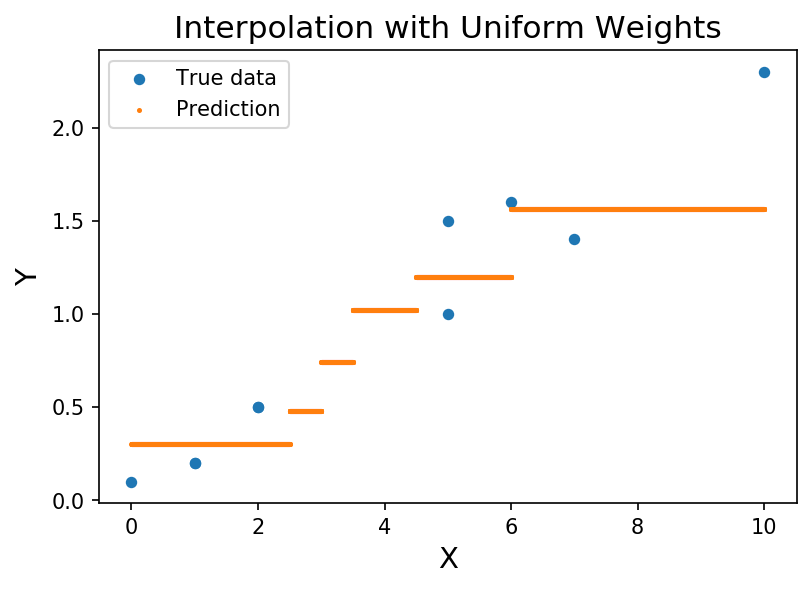

In [8]:
# Use default Uniform Weight
plt.scatter(sample_X,sample_y,label='True data',s=20)
plt.scatter(test_X,y_pred,label='Prediction',s=2)
plt.title('Interpolation with Uniform Weights',fontsize=15)
plt.xlabel('X',fontsize=14)
plt.ylabel('Y',fontsize=14)
plt.legend()

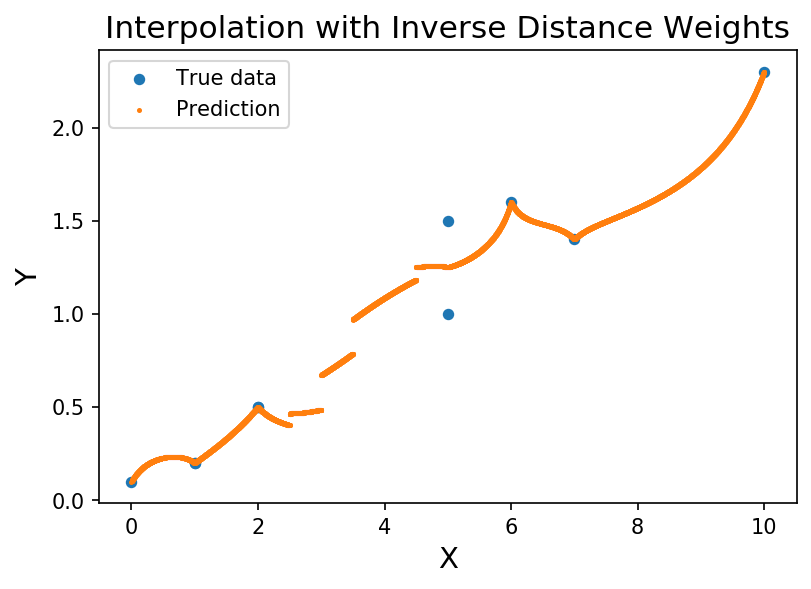

In [9]:
# Use Inverse Distance Weight
knn = KNeighborsRegressor(n_neighbors=5,weights='distance')
knn.fit(sample_X, sample_y)
y_pred = knn.predict(test_X)
plt.scatter(sample_X,sample_y,label='True data',s=20)
plt.scatter(test_X,y_pred,label='Prediction',s=2)
plt.title('Interpolation with Inverse Distance Weights',fontsize=15)
plt.xlabel('X',fontsize=14)
plt.ylabel('Y',fontsize=14)
plt.legend()

# Using Gaussian Kernel

In [10]:
# define gaussian kernel
def gaussian_kernel(distances):
    kernel_width = 2 # You have to tune this later
    weights = np.exp(-(distances**2)/kernel_width)
    return weights

In [11]:
# Use our previously generated data with new weighting function
knn = KNeighborsRegressor(n_neighbors=5,weights=gaussian_kernel)
knn.fit(sample_X, sample_y)
y_pred_gauss = knn.predict(test_X)

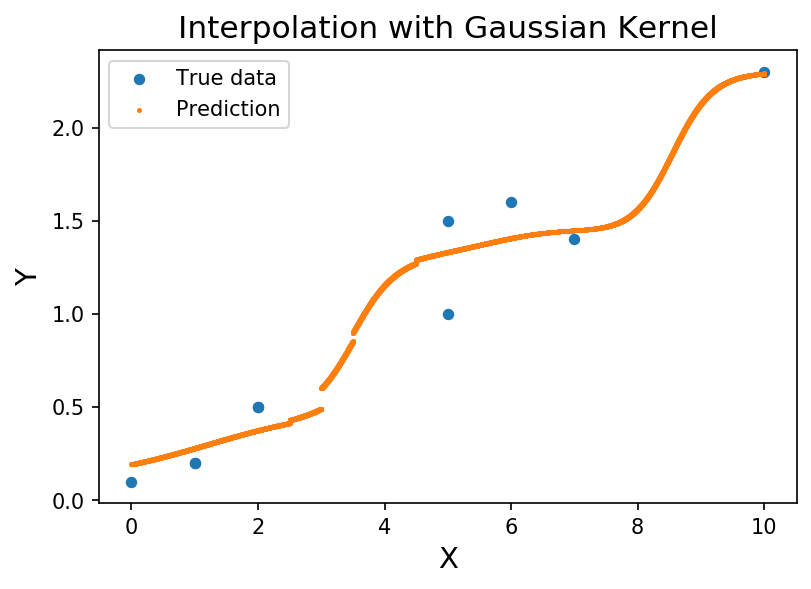

In [12]:
# Plot our new predicted points
plt.scatter(sample_X,sample_y,label='True data',s=20)
plt.scatter(test_X,y_pred_gauss,label='Prediction',s=2)
plt.title('Interpolation with Gaussian Kernel',fontsize=15)
plt.xlabel('X',fontsize=14)
plt.ylabel('Y',fontsize=14)
plt.legend()

# Try Other Values for Kernel Width!!! Plot will change.
* To Tune the kernel width, you will either want to do one of the two:
    1. If for only quick visualization purpose, you can choose visually appealing parameter
    2. If you are trying to actually predict well, you need to split train test data and do cross-validation for each kernel width parameter. I recommend using grid search. (i.e., get accuracy for kernel_width=0.2, 0.4, 0.6, 0.8 and compare)
* I highly recommend #2 if you are tuning the model seriously or presenting the plot seriously.

# Appendix: Tuning Width and K

In [13]:
# This split library makes life easier. Link below.
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split

Text(0.5, 1.0, 'Generated Data')

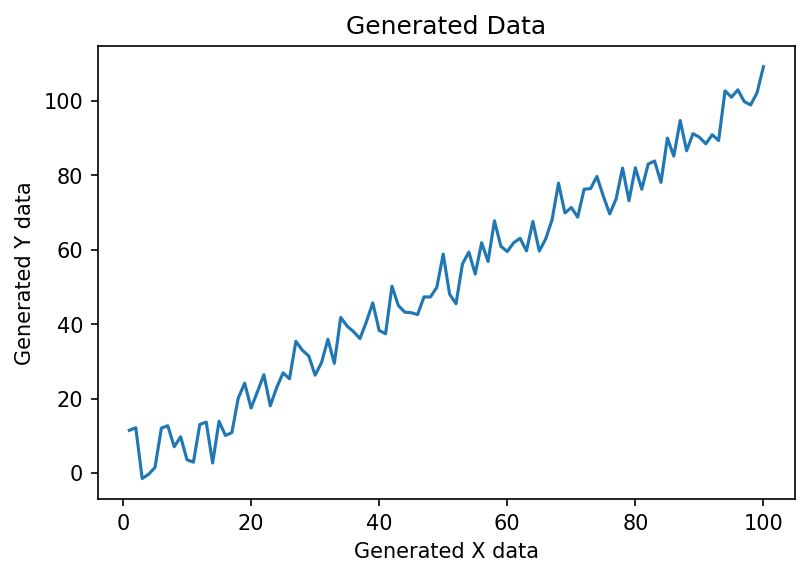

In [49]:
# Generate a dataset
gen_X = np.array(list(range(1,101)))
gen_Y = np.array(list(range(1,101))) + np.random.normal(0, 5, 100)# mu=0, std=5
plt.plot(gen_X, gen_Y)
plt.xlabel('Generated X data')
plt.ylabel('Generated Y data')
plt.title('Generated Data')

In [24]:
np.random.randint(1, 1000, 30)/1000

array([0.689, 0.496, 0.629, 0.609, 0.854, 0.672, 0.628, 0.71 , 0.247,
       0.808, 0.414, 0.357, 0.427, 0.423, 0.113, 0.972, 0.933, 0.369,
       0.898, 0.118, 0.32 , 0.634, 0.715, 0.015, 0.965, 0.868, 0.488,
       0.861, 0.1  , 0.022])

In [45]:
# Run many combinations in a grid search manner
# To start out, you need to heuristically define your bounds.

results = [] # we will store our results here.

for k in range(1, 12): # maximum neighbor is 9 since 9:1 train split
    
    # you can create your own list
    # for w in np.array([0.1, 0.5, 1, 10, 100])
    for w in np.random.randint(5, 100000, 100)/1000:
        
        temp_mae = [] # temporary storage for mean absolute error
        
        # Set kernel_width = w
        def gaussian_kernel(distances):
            kernel_width = w
            weights = np.exp(-(distances**2)/kernel_width)
            return weights
        
        # We take average of ten bootstrapped model.
        for i in range(0,100):
            # Below is my personal way of setting random state. This makes each run a bootstrapped model.
            X_train, X_test, y_train, y_test = train_test_split(gen_X.reshape(-1,1),
                                                                gen_Y,
                                                                test_size=0.1,
                                                                random_state=int(100*np.random.random()))
            knn = KNeighborsRegressor(n_neighbors=k,weights=gaussian_kernel)
            knn.fit(X_train, y_train)
            y_pred = knn.predict(X_test)
            mean_absolute_error = np.mean(abs(y_pred-y_test))
            temp_mae.append(mean_absolute_error)
        average_over_ten_runs = np.mean(temp_mae)
        results.append([k, w, average_over_ten_runs]) # We store our run result.
        
# You can see that our results are stored in format of [k, w, mean_absolute_error]
results

[[1, 43.798, 5.463376416406829],
 [1, 33.204, 5.651920525939341],
 [1, 84.441, 5.4132745678353364],
 [1, 66.99, 5.607144790434031],
 [1, 4.366, 5.408458882209901],
 [1, 33.471, 5.4027607731408125],
 [1, 35.985, 5.494255209192045],
 [1, 75.124, 5.3274522511463775],
 [1, 2.392, 5.588123602621994],
 [1, 63.22, 5.3407382794291],
 [1, 78.546, 5.491311705916449],
 [1, 21.824, 5.399820969791196],
 [1, 27.034, 5.435126558983772],
 [1, 31.101, 5.414589158966893],
 [1, 88.387, 5.421779619639932],
 [1, 80.983, 5.660799238761809],
 [1, 67.12, 5.3953681307945205],
 [1, 28.442, 5.49024742740447],
 [1, 12.109, 5.424151623411949],
 [1, 10.561, 5.662999773479811],
 [1, 31.862, 5.673881866499264],
 [1, 64.185, 5.555418781869784],
 [1, 37.181, 5.632017440448529],
 [1, 84.656, 5.622481791996421],
 [1, 71.73, 5.702702360843354],
 [1, 24.845, 5.478841705856871],
 [1, 78.32, 5.487878608995389],
 [1, 74.752, 5.452852349476851],
 [1, 46.044, 5.4275465115555575],
 [1, 78.312, 5.581225084712741],
 [1, 48.398, 5.

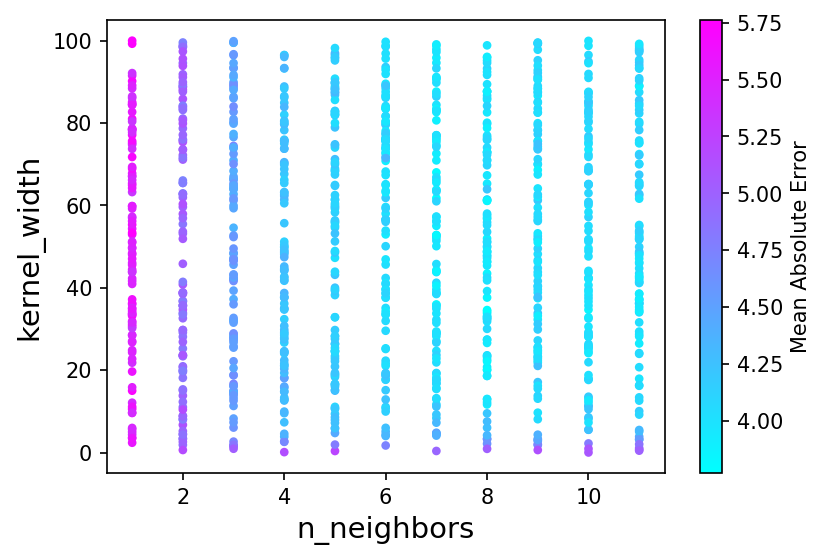

In [46]:
# For easier access of columns, convert to numpy array 
results = np.array(results)
# Now we visualize.
plt.scatter(results[:,0],results[:,1],c=results[:,2],cmap='cool',s=10)
plt.xlabel('n_neighbors', fontsize=14)
plt.ylabel('kernel_width', fontsize=14)
plt.colorbar().set_label('Mean Absolute Error')
#plt.clim(3, 4.0)


In [47]:
results[:,2].min()

3.769837005641059

In [48]:
results[results[:,2].argmin()]

array([ 7.        , 61.739     ,  3.76983701])